In [99]:
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
data = pd.read_csv("executions.csv", index_col="exec_date", parse_dates=True)
data

,id,side,price,size,buy_child_order_acceptance_id,sell_child_order_acceptance_id
exec_date,,,,,,
2020-01-01 05:26:02.325652200+00:00,1489606221,BUY,796188,0.211995,JRF20200101-052601-210508,JRF20200101-052559-380108
2020-01-01 05:26:02.325652200+00:00,1489606222,BUY,796188,0.010000,JRF20200101-052601-210508,JRF20200101-052602-932673
2020-01-01 05:26:02.325652200+00:00,1489606223,BUY,796189,0.190000,JRF20200101-052601-210508,JRF20200101-052559-380114
2020-01-01 05:26:02.325652200+00:00,1489606224,BUY,796193,0.010000,JRF20200101-052601-210508,JRF20200101-052601-139930
2020-01-01 05:26:02.325652200+00:00,1489606225,BUY,796194,0.006083,JRF20200101-052601-210508,JRF20200101-052428-440335
...,...,...,...,...,...,...
2020-01-01 13:05:34.917579300+00:00,1489970628,SELL,796402,0.020000,JRF20200101-130534-716578,JRF20200101-130534-037335
2020-01-01 13:05:34.917579300+00:00,1489970629,SELL,796401,0.060000,JRF20200101-130531-283740,JRF20200101-130534-037335
2020-01-01 13:05:34.917579300+00:00,1489970630,SELL,796387,0.010000,JRF20200101-130523-088992,JRF20200101-130534-037335


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 342545 entries, 2020-01-01 05:26:02.325652200+00:00 to 2020-01-01 13:05:36.394709700+00:00
Data columns (total 6 columns):
id                                342545 non-null int64
side                              342545 non-null object
price                             342545 non-null int64
size                              342545 non-null float64
buy_child_order_acceptance_id     342545 non-null object
sell_child_order_acceptance_id    342545 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 18.3+ MB


In [102]:
print(type(data.index[0]))
data.index[0]

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Timestamp('2020-01-01 05:26:02.325652200+0000', tz='UTC')

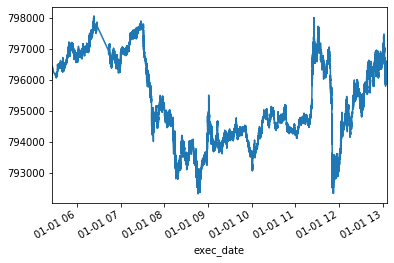

In [103]:
data["price"].plot()

In [104]:
# 間が空いてしまったデータがあったら分割する
period = data.loc[data["id"].diff() > 100]
period

,id,side,price,size,buy_child_order_acceptance_id,sell_child_order_acceptance_id
exec_date,,,,,,
2020-01-01 05:31:40.829340300+00:00,1489609745,SELL,796077,0.040000,JRF20200101-053139-644404,JRF20200101-053140-142268
2020-01-01 06:04:37.596310200+00:00,1489627971,SELL,796796,0.016682,JRF20200101-060436-588781,JRF20200101-060437-332911
2020-01-01 06:43:39.490242+00:00,1489653815,BUY,796936,0.034580,JRF20200101-064339-001468,JRF20200101-064338-019606


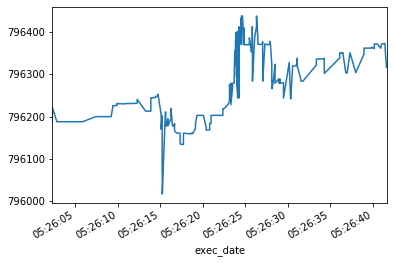

In [105]:
sections = [data[data.index < period.index[0]]]
sections[0]["price"].plot()

In [106]:
for l, r in zip(period.index, period.index[1:]):
    print(l, r)
    sections.append(data[(l <= data.index) & (data.index < r)])

2020-01-01 05:31:40.829340300+00:00 2020-01-01 06:04:37.596310200+00:00
2020-01-01 06:04:37.596310200+00:00 2020-01-01 06:43:39.490242+00:00


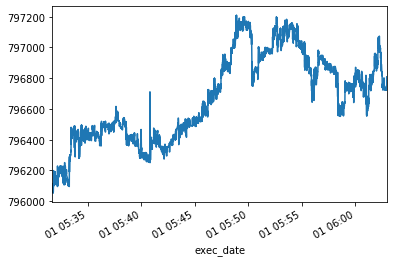

In [107]:
sections[1]["price"].plot()

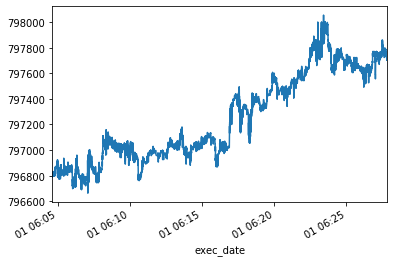

In [108]:
sections[2]["price"].plot()

(309822,)


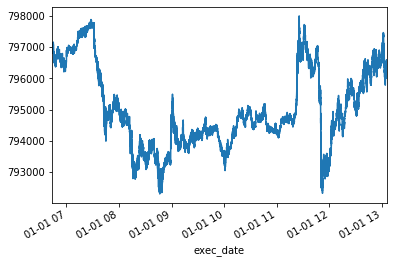

In [109]:
sections.append(data[period.index[2] <= data.index])
print(sections[3]["price"].shape)
sections[3]["price"].plot()